# Titanic EDA Project #
Adil Khan
**Please use this template and fill in your code and comments (* as frequent as applicable *) ** 

You may add more cells but *do not change the order or delete template cells*

**add your readme here** if you have any special configuration or steps needed to follow to run your code 


## Step 1: Reading the data

In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_Titanic/train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Step 2: Cleaning the data

**1** . Create a bar chart showing how many missing values are in each column

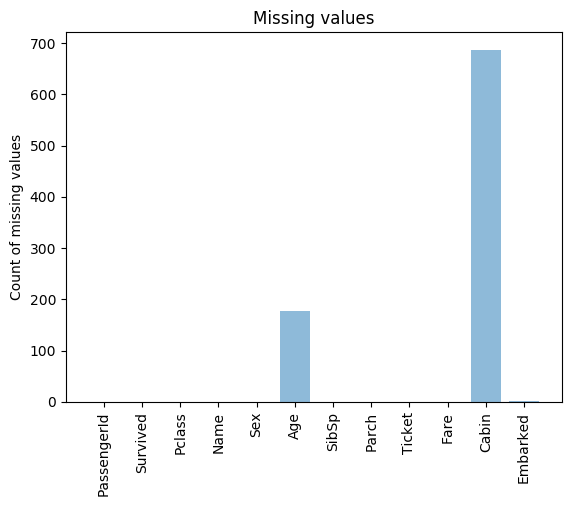

In [59]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = df.columns
y_pos = np.arange(len(objects))
performance = df.isnull().sum()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('Count of missing values')
plt.title('Missing values')
 
plt.show()

**2** . Which column has the most `NaN` values?

In [ ]:
Cabin has the most NAN values

How many cells in that column are empty?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**3**. Delete all rows where `Embarked` is empty

In [60]:
df = df[df['Embarked'].notnull()]

**4**. Fill all empty cabins with **¯\\_(ツ)_/¯**
 
 Note: `NaN`, empty, and missing are synonymous.

In [5]:
Step not clear

(889, 12)

## Step 3: Feature extraction

**1**. There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [61]:
df['FamilyCount'] = df['SibSp'] + df['Parch']
df.drop(labels=["Parch","SibSp"], axis=1, inplace=True)

**2**. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [62]:
df['IsReverend'] = np.where(df['Name'].str.contains("Rev."), '1', '0')

**3**. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`

Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

In [63]:
df['Embarked_C'] = np.where(df['Embarked'].str.contains("C"), '1', '0')
df['Embarked_S'] = np.where(df['Embarked'].str.contains("S"), '1', '0')
df['Embarked_Q'] = np.where(df['Embarked'].str.contains("Q"), '1', '0')

Do the same thing for `Sex`

In [64]:
df['Sex'] = np.where(df['Sex'].str.contains("female"), '0', '1')

BONUS: Extract the title from everyone's name and create dummy columns

In [65]:
df['titles'] = df['Name'].str.extract(r"\,([A-Za-z0-9 _]+)\.")

/Users/adilkhan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


## Step 4: Exploratory analysis

**1**. What was the survival rate overall?

In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,32.096681,0.906637
std,256.998173,0.486260,0.834700,14.492933,49.697504,1.614703
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,38.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


About the survival rate, only 38% passenger survived during that tragedy.

**2**. Which gender fared the worst? 

In [67]:
survived_summary = df.groupby("Sex")
survived_summary.mean()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
Sex,,,,,,
0,430.932692,0.740385,2.166667,27.745174,44.252124,1.352564
1,454.147314,0.188908,2.389948,30.726645,25.523893,0.665511


Male gender fared the worst.

What was their survival rate?

In [68]:
Only 19% of males survived.

SyntaxError: invalid syntax (<ipython-input-68-f27f9a59c4a8>, line 1)

**3**. What was the survival rate for each `Pclass`?

In [69]:
survived_summary = df.groupby("Pclass")
survived_summary.mean()

,PassengerId,Survived,Age,Fare,FamilyCount
Pclass,,,,,
1,461.742991,0.626168,38.105543,84.193516,0.780374
2,445.956522,0.472826,29.877630,20.662183,0.782609
3,439.154786,0.242363,25.140620,13.675550,1.008147


About the survival rate for Pclass, 63% first class passengers survived, 47% of second class passengers survived, while only 25% lower class passenger survived.

**4**. Did any reverends survive? How many?

In [70]:
survived_summary = df.groupby("Sex")
survived_summary.mean()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
Sex,,,,,,
0,430.932692,0.740385,2.166667,27.745174,44.252124,1.352564
1,454.147314,0.188908,2.389948,30.726645,25.523893,0.665511


None of the reverends survived.

**5**. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [ ]:
Step not clear.

**6** . What is the survival rate for people whose `Age` is empty?

In [79]:
df1 = df[df['Age'].isnull()]
df1.describe()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,22.158567,0.745763
std,250.552901,0.456787,0.763216,NaN,31.874608,2.052658
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,7.750000,0.000000
50%,452.000000,0.000000,3.000000,NaN,8.050000,0.000000
75%,634.000000,1.000000,3.000000,NaN,24.150000,0.000000
max,889.000000,1.000000,3.000000,NaN,227.525000,10.000000


For people whose age is empty, the survival rate is 29%.

**7** .What is the survival rate for each port of embarkation?

In [80]:
survived_summary = df.groupby("Embarked_Q")
survived_summary.mean()


,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
Embarked_Q,,,,,,
0,448.665025,0.381773,2.254926,29.705658,33.881398,0.935961
1,417.896104,0.389610,2.909091,28.089286,13.276030,0.597403


In [81]:
survived_summary = df.groupby("Embarked_S")
survived_summary.mean()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
Embarked_S,,,,,,
0,436.726531,0.502041,2.208163,30.331772,45.283880,0.702041
1,449.527950,0.336957,2.350932,29.445397,27.079812,0.984472


In [82]:
survived_summary = df.groupby("Embarked_C")
survived_summary.mean()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
Embarked_C,,,,,,
0,446.149792,0.342580,2.410541,29.380155,25.605621,0.943135
1,445.357143,0.553571,1.886905,30.814769,59.954144,0.750000


People who embarked at Cherbourg had the highest survival rate with 55%, while people embarking at Southampton & Queenstown had the same survival rate of 33%.

**8** .What is the survival rate for children (under 12) in each `Pclass`?

In [83]:
df2 = df[df['Age'] < 12]
survived_summary = df.groupby("Pclass")
survived_summary.mean()

,PassengerId,Survived,Age,Fare,FamilyCount
Pclass,,,,,
1,461.742991,0.626168,38.105543,84.193516,0.780374
2,445.956522,0.472826,29.877630,20.662183,0.782609
3,439.154786,0.242363,25.140620,13.675550,1.008147


Survival rate for children for 1st class = 62%
Survival rate for children for 2nd class = 47%
Survival rate for children for 3rd class = 24%

**9** . Did the captain of the ship survive? Is he on the list?

In [84]:
df[df['Name'].str.contains("Capt.")]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_S,Embarked_Q,titles
745,746,0,1,"Crosby, Capt. Edward Gifford",1,70.0,WE/P 5735,71.0,B22,S,2,0,0,1,0,Capt


In [ ]:
Nope, the captain of the ship did not survive.

**10** . Of all the people that died, who had the most expensive ticket? How much did it cost?

In [85]:
df3 = df[df['Survived'] == 0]
df3.loc[df3['Fare'].idxmax()]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                         1
Age                                        19
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
FamilyCount                                 5
IsReverend                                  0
Embarked_C                                  0
Embarked_S                                  1
Embarked_Q                                  0
titles                                     Mr
Name: 27, dtype: object

In [ ]:
Mr. Charles Alexander had bought the most expensive ticket.

**11**. Does having family on the boat help or hurt your chances of survival?

In [86]:
df4 = df[df['FamilyCount'] == 0]
df4.describe()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
count,535.000000,535.000000,535.000000,402.000000,535.000000,535.0
mean,458.044860,0.300935,2.405607,32.131841,21.023035,0.0
std,255.111413,0.459094,0.801430,12.842661,42.148823,0.0
min,3.000000,0.000000,1.000000,5.000000,0.000000,0.0
25%,235.500000,0.000000,2.000000,22.000000,7.775000,0.0
50%,466.000000,0.000000,3.000000,29.000000,8.112500,0.0
75%,679.500000,1.000000,3.000000,39.000000,14.500000,0.0
max,891.000000,1.000000,3.000000,80.000000,512.329200,0.0


People without any family on board had a survival rate of 30%.

In [48]:
df5 = df[df['FamilyCount'] != 0]
df5.describe()

,PassengerId,Survived,Pclass,Age,Fare,FamilyCount
count,354.000000,354.000000,354.000000,310.000000,354.000000,354.000000
mean,427.796610,0.505650,2.169492,26.413452,48.832275,2.276836
std,259.122836,0.500676,0.864520,15.834923,55.307615,1.852087
min,1.000000,0.000000,1.000000,0.420000,6.495800,1.000000
25%,195.000000,0.000000,1.000000,16.000000,18.000000,1.000000
50%,419.000000,1.000000,2.000000,26.000000,27.750000,2.000000
75%,645.750000,1.000000,3.000000,37.000000,59.044800,3.000000
max,889.000000,1.000000,3.000000,70.000000,512.329200,10.000000


In [ ]:
People with family on board had a survival rate of 50%. So it did matter to have family on board.

## Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

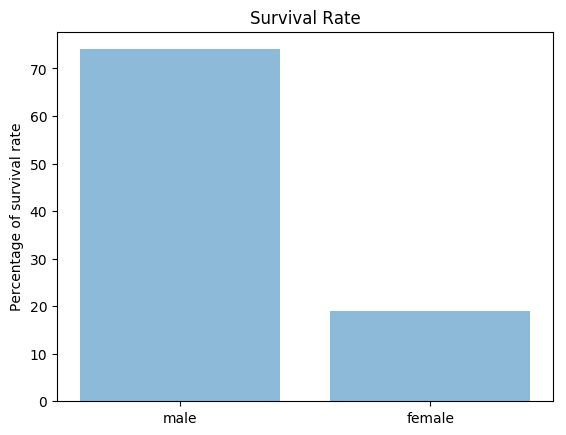

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

survived_summary = df.groupby("Sex")
objects = ['male','female']
y_pos = np.arange(len(objects))
performance = survived_summary.Survived.mean() * 100
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of survival rate')
plt.title('Survival Rate based on gender')
 
plt.show()

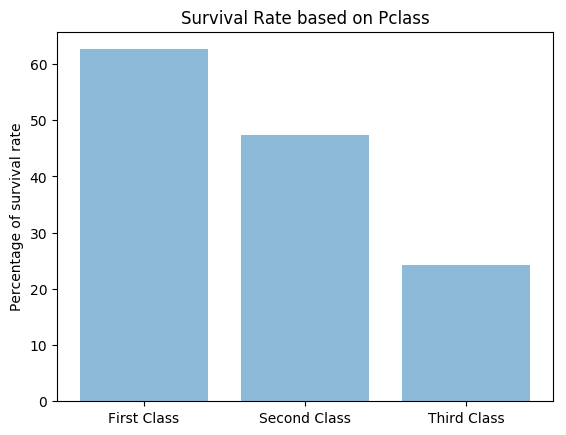

In [56]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

survived_summary = df.groupby("Pclass")
objects = ['First Class','Second Class','Third Class']
y_pos = np.arange(len(objects))
performance = survived_summary.Survived.mean() * 100
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of survival rate')
plt.title('Survival Rate based on Pclass')
 
plt.show()

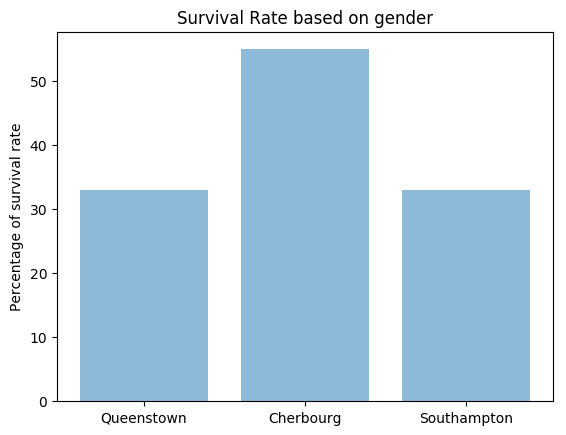

In [57]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

survived_summary = df.groupby("Sex")
objects = ['Queenstown','Cherbourg','Southampton']
y_pos = np.arange(len(objects))
performance = [33,55,33]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of survival rate')
plt.title('Survival Rate based on gender')
 
plt.show()